<a href="https://www.kaggle.com/code/subhajeetdas/heart-attack-prediction?scriptVersionId=157185554" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
!pip install dtreeviz -q      # '-q' used for quite installation

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Loading Data

In [3]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

# Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
output    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

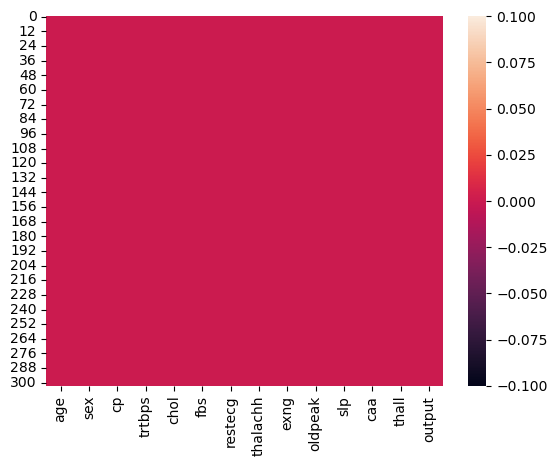

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
df.size

4242

In [10]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

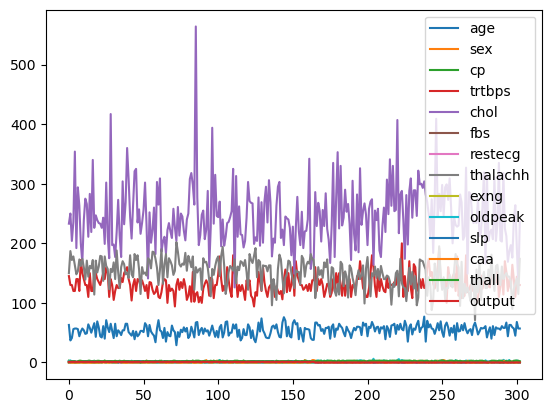

In [11]:
df.plot()

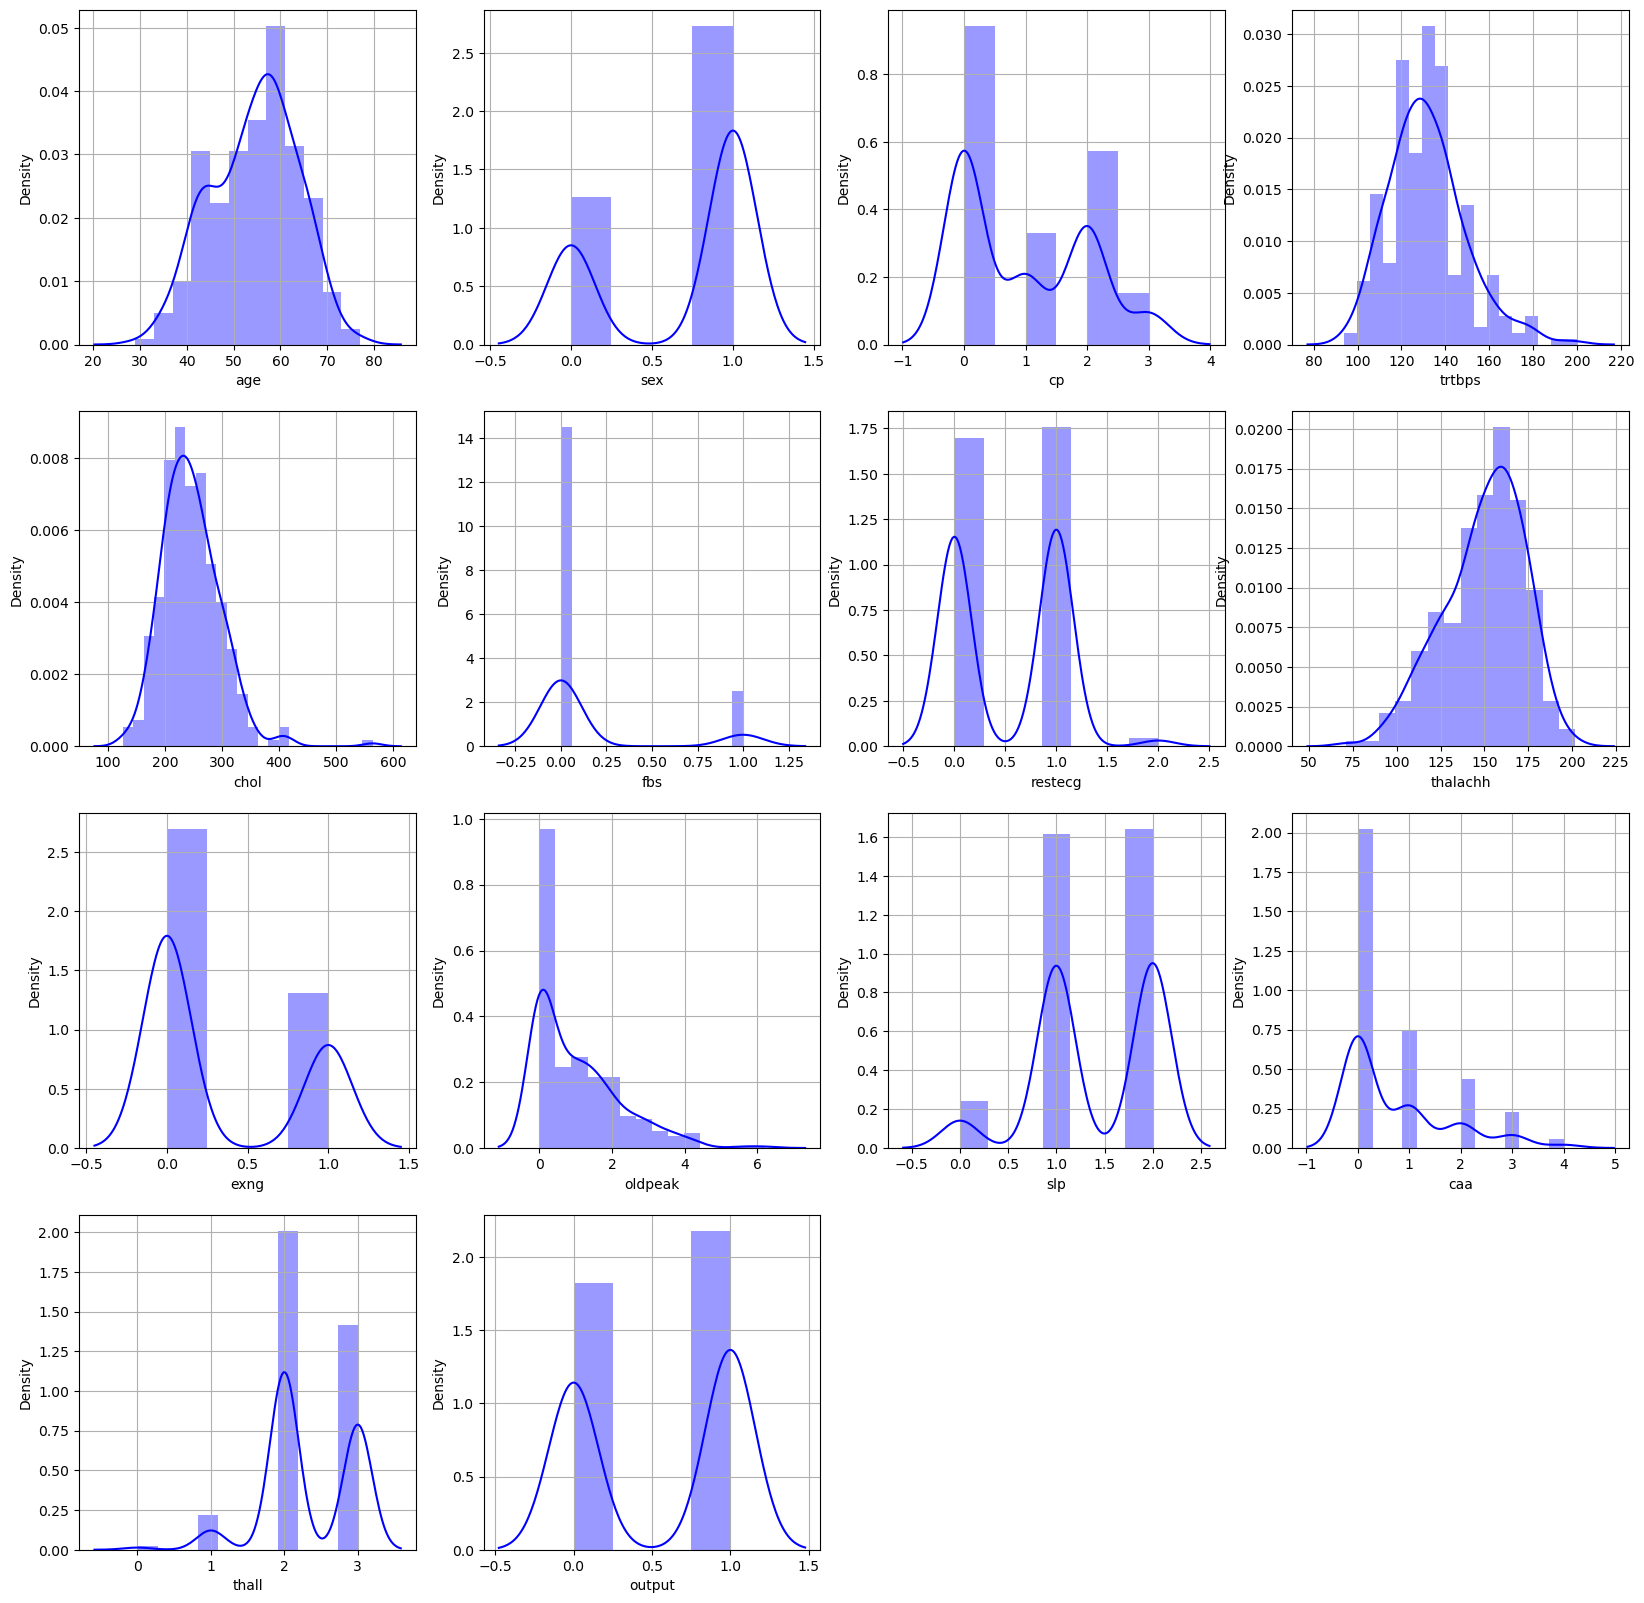

In [12]:
plt.figure(figsize = (20, 20))

for i in range(len(df.columns)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df.iloc[:, i], color = 'blue')
    plt.grid()

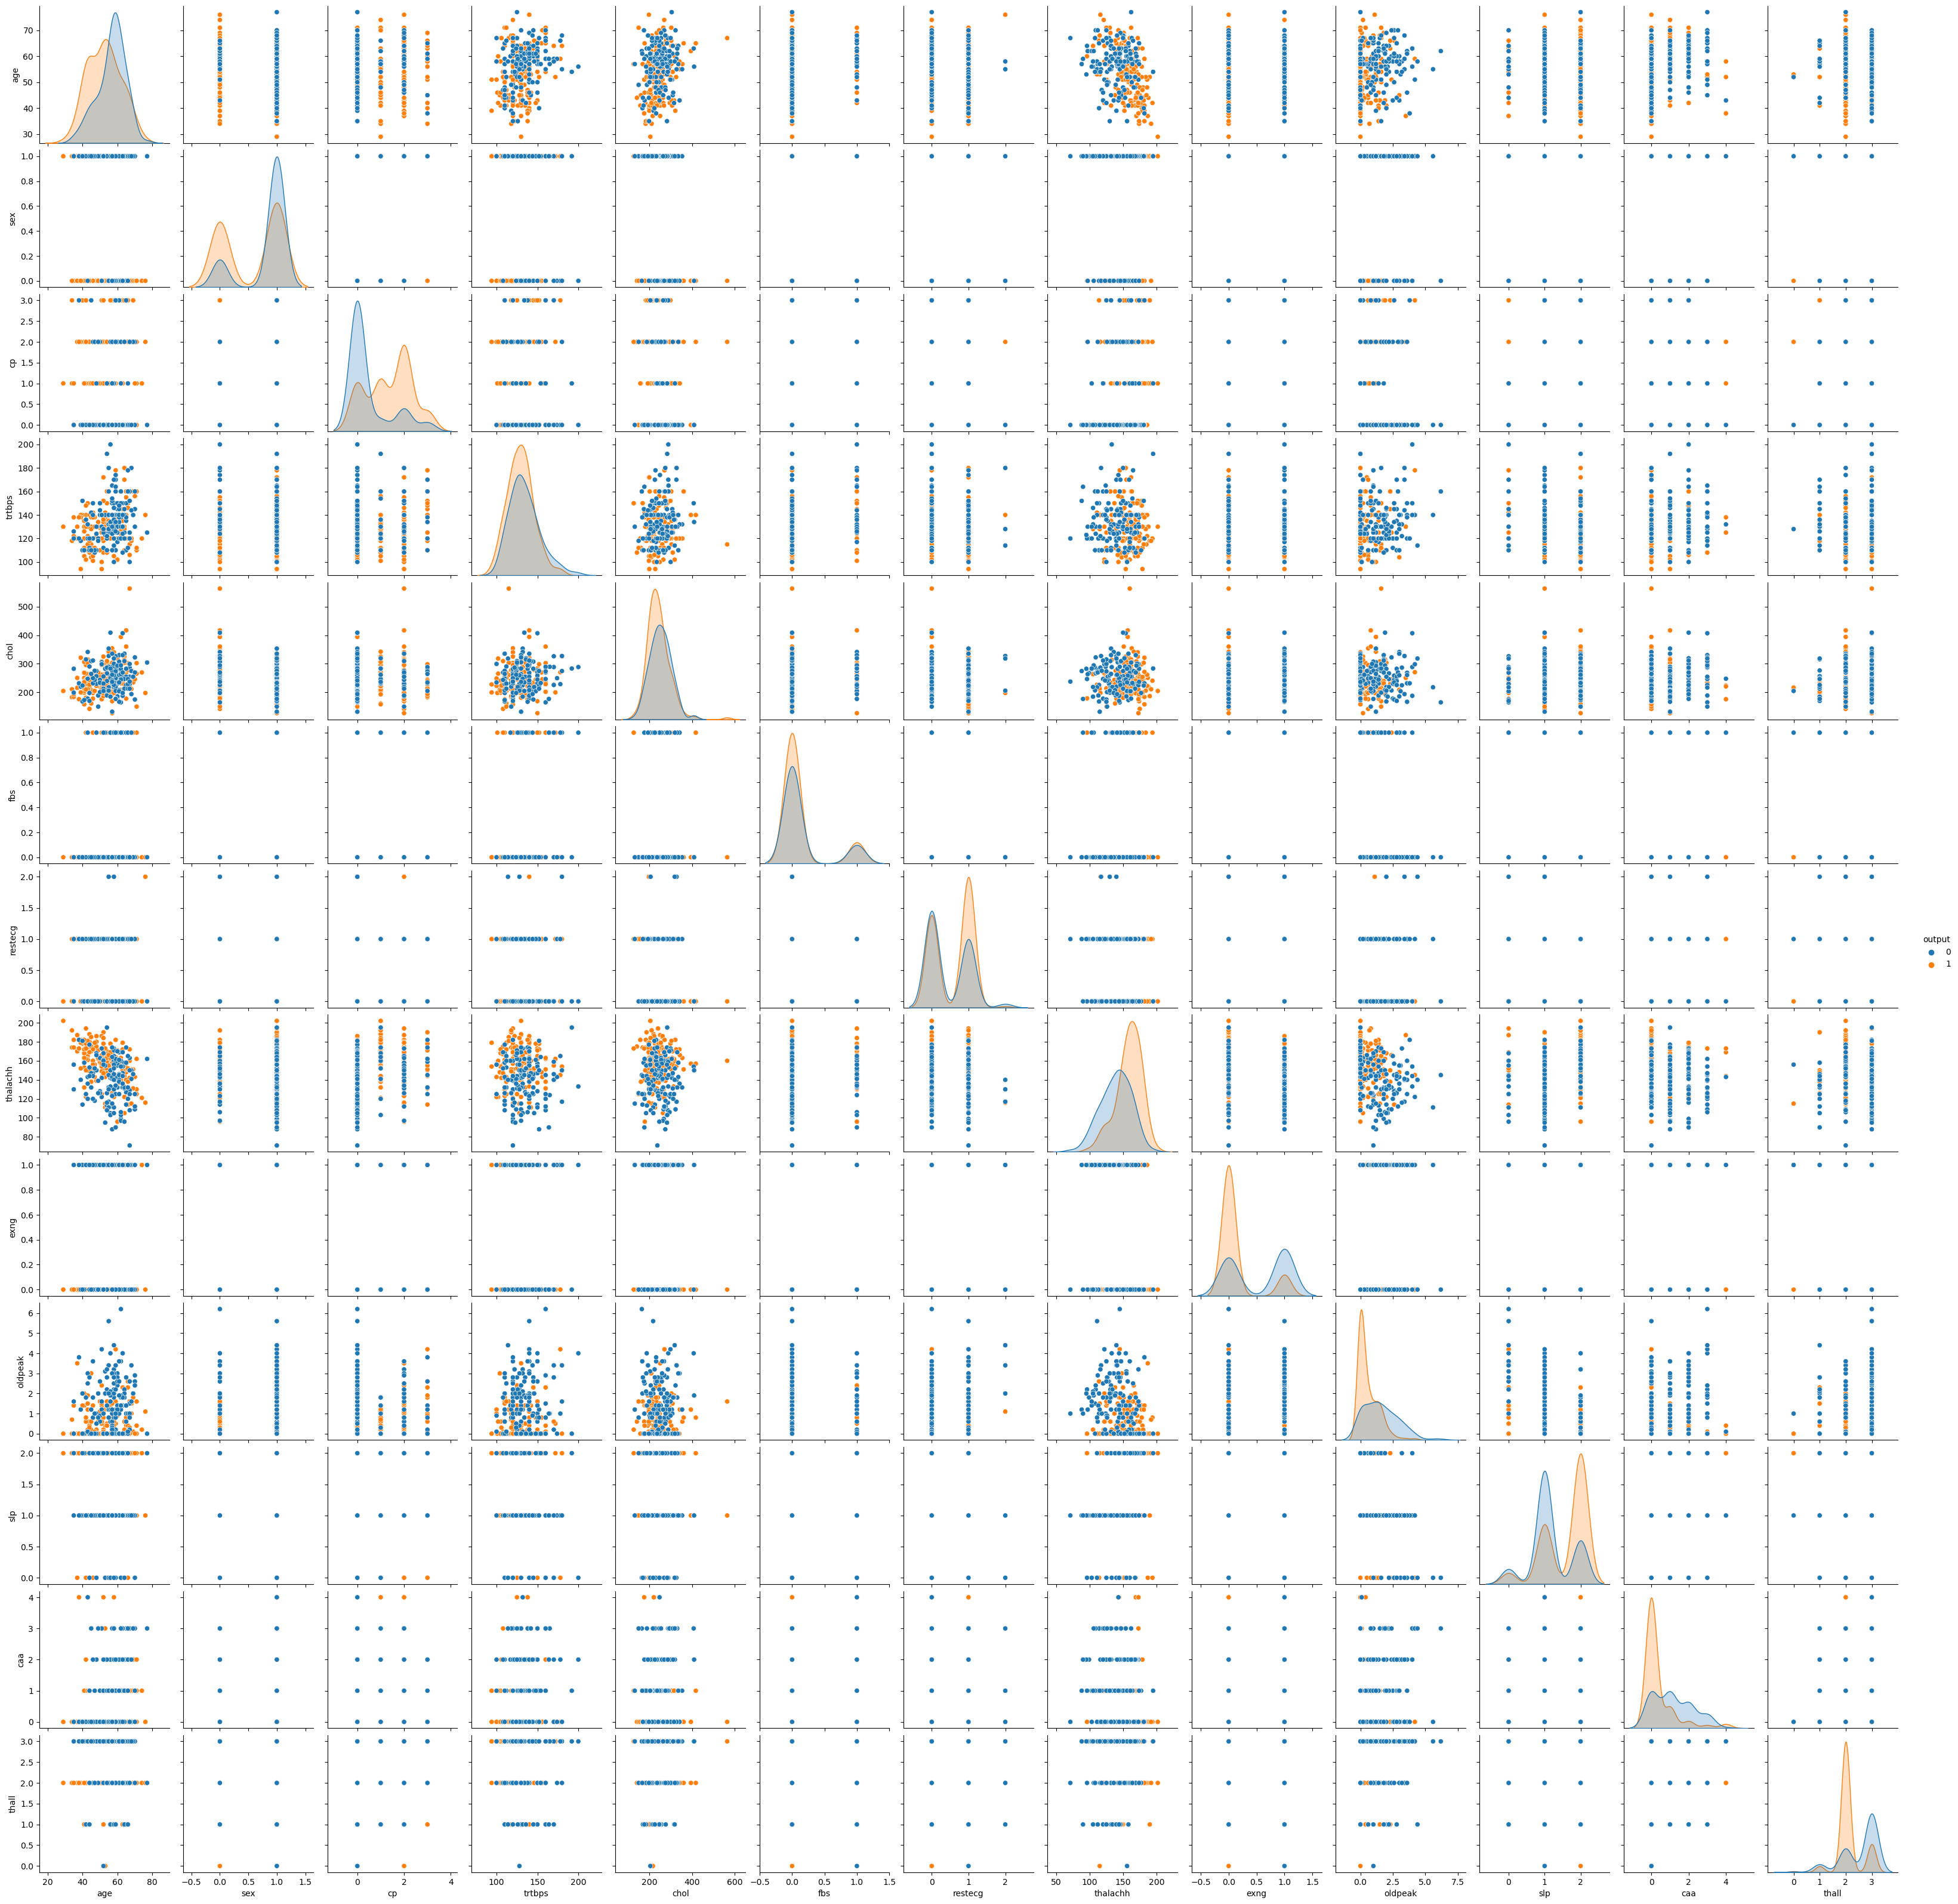

In [13]:
sns.pairplot(df, hue = 'output')

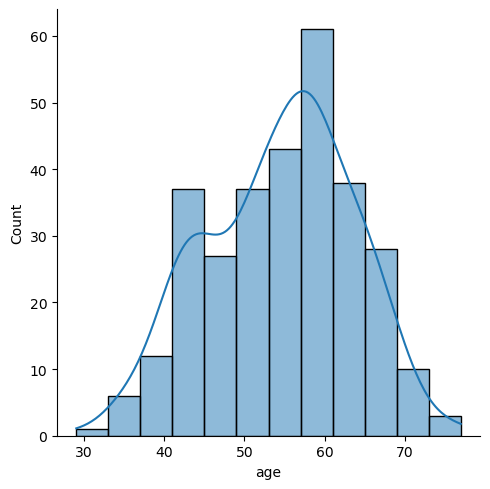

In [14]:
sns.displot(df['age'], kde=True)

<AxesSubplot:xlabel='output', ylabel='Density'>

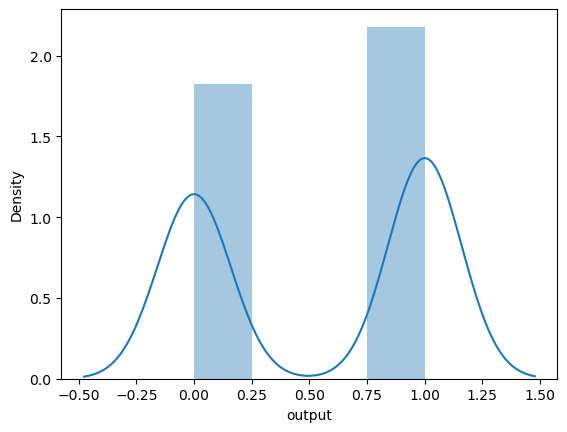

In [15]:
sns.distplot(df.output)

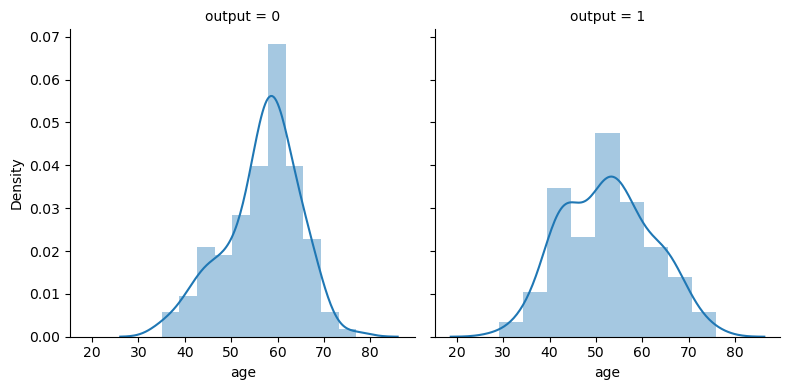

In [16]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "age")

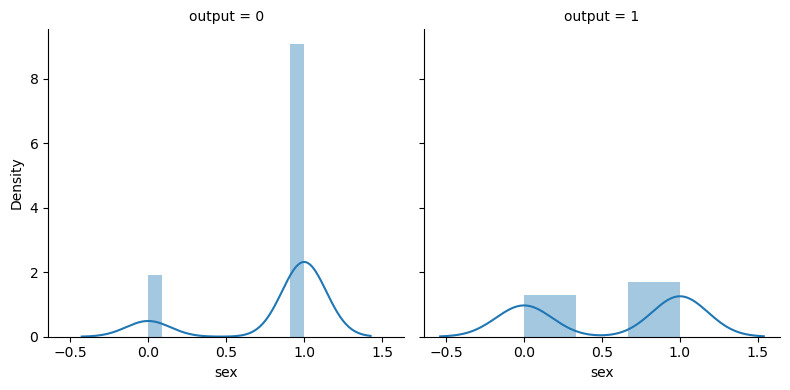

In [17]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "sex")

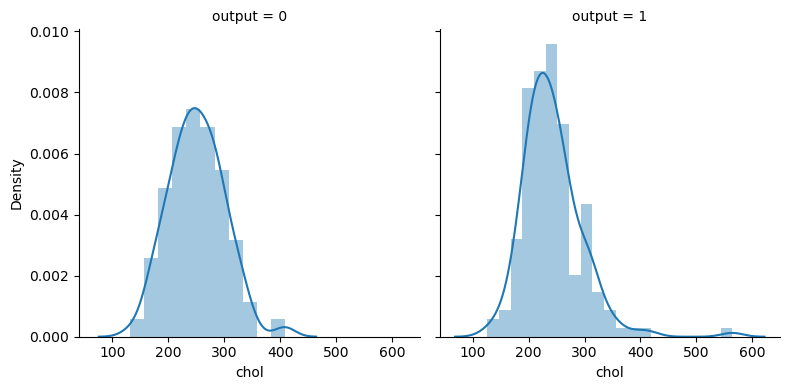

In [18]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "chol")

In [19]:
X = df.iloc[:, :13]
X

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2  
2      0      2  
3      0      2  
4      0      2  
..   ...    ...  
298    0      3  
299    0      3  
300    2      3  
301    1      3  
302    1      2  

[303 rows x 13 columns]

In [20]:
x = X.values
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [21]:
Y = df.iloc[:, -1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [22]:
Y.value_counts()

1    165
0    138
Name: output, dtype: int64

In [23]:
y = Y.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Resampling using SMOTE

In [24]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(X, Y)

In [25]:
print(x_resampled.shape)

(330, 13)


In [26]:
print(y_resampled.value_counts())

1    165
0    165
Name: output, dtype: int64


# Train & Test Splitting the Data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=1)

In [28]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'High'])
    cm.plot()

# Gaussian Naive Bayes

In [29]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

In [30]:
y_pred_gnb = model_gnb.predict(x_test)

Precision :  0.8
Recall :  0.6666666666666666
Accuracy :  0.7727272727272727
F1 Score :  0.7272727272727272

 [[31  5]
 [10 20]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        36
           1       0.80      0.67      0.73        30

    accuracy                           0.77        66
   macro avg       0.78      0.76      0.77        66
weighted avg       0.78      0.77      0.77        66

******************************************************



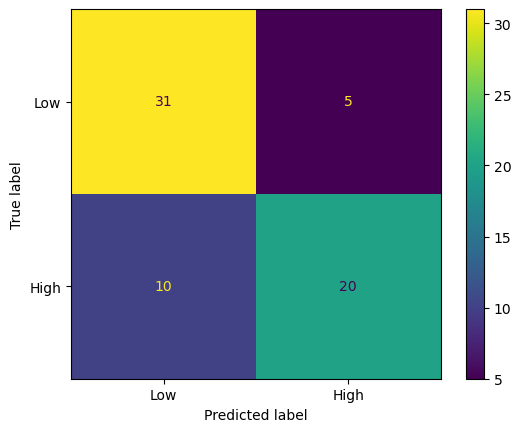

In [31]:
perform(y_pred_gnb)

## Save the Gaussian Naive Bayes model

In [32]:
filename = 'Heart_Attack_Prediction_GNB.h5'
pickle.dump(model_gnb, open(filename, 'wb'))

# Multinomial Naive Bayes

In [33]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [34]:
y_pred_mnb = model_mnb.predict(x_test)

Precision :  0.6923076923076923
Recall :  0.6
Accuracy :  0.696969696969697
F1 Score :  0.6428571428571429

 [[28  8]
 [12 18]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        36
           1       0.69      0.60      0.64        30

    accuracy                           0.70        66
   macro avg       0.70      0.69      0.69        66
weighted avg       0.70      0.70      0.69        66

******************************************************



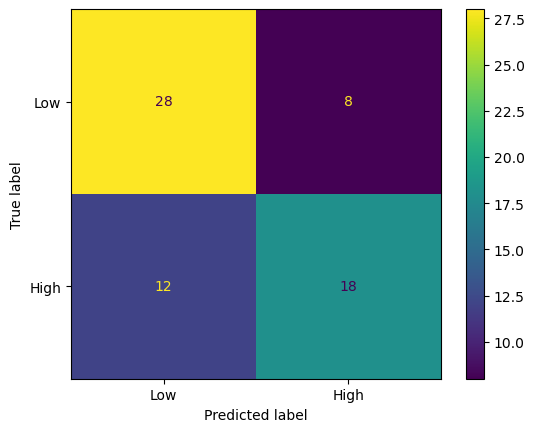

In [35]:
perform(y_pred_mnb)

## Save the Multinomial Naive Bayes model

In [36]:
filename = 'Heart_Attack_Prediction_MNB.h5'
pickle.dump(model_mnb, open(filename, 'wb'))

# Bernoulli Naive Bayes

In [37]:
model_bnb = BernoulliNB()
model_bnb.fit(x_train, y_train)

BernoulliNB()

In [38]:
y_pred_bnb = model_bnb.predict(x_test)

Precision :  0.8
Recall :  0.6666666666666666
Accuracy :  0.7727272727272727
F1 Score :  0.7272727272727272

 [[31  5]
 [10 20]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        36
           1       0.80      0.67      0.73        30

    accuracy                           0.77        66
   macro avg       0.78      0.76      0.77        66
weighted avg       0.78      0.77      0.77        66

******************************************************



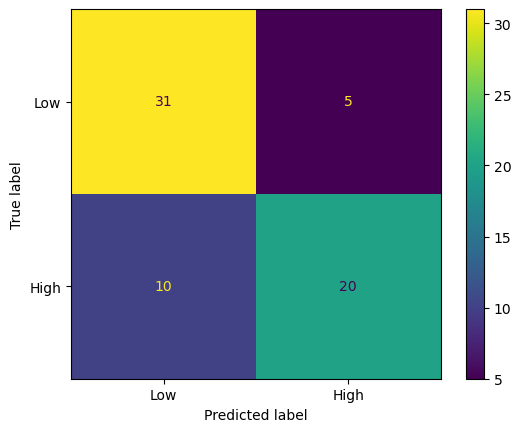

In [39]:
perform(y_pred_bnb)

## Save the Bernoulli Naive Bayes model

In [40]:
filename = 'Heart_Attack_Prediction_BNB.h5'
pickle.dump(model_bnb, open(filename, 'wb'))

# Logistic Regreasion

In [41]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [42]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.8214285714285714
Recall :  0.7666666666666667
Accuracy :  0.8181818181818182
F1 Score :  0.793103448275862

 [[31  5]
 [ 7 23]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        36
           1       0.82      0.77      0.79        30

    accuracy                           0.82        66
   macro avg       0.82      0.81      0.82        66
weighted avg       0.82      0.82      0.82        66

******************************************************



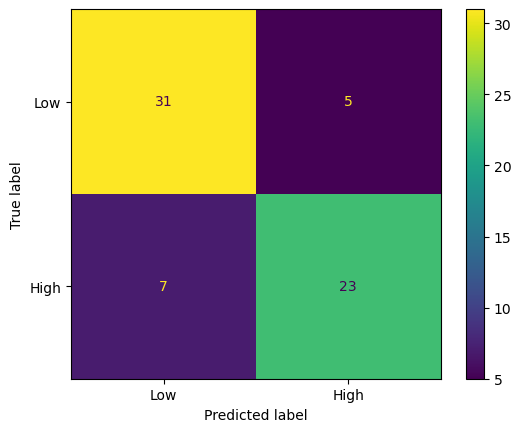

In [43]:
perform(y_pred_lr)

## Save the Logistic Regression model

In [44]:
filename = 'Heart_Attack_Prediction_LR.h5'
pickle.dump(model_lr, open(filename, 'wb'))

# XGBoost Classifier

In [45]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [46]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  0.7586206896551724
Recall :  0.7333333333333333
Accuracy :  0.7727272727272727
F1 Score :  0.7457627118644068

 [[29  7]
 [ 8 22]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        36
           1       0.76      0.73      0.75        30

    accuracy                           0.77        66
   macro avg       0.77      0.77      0.77        66
weighted avg       0.77      0.77      0.77        66

******************************************************



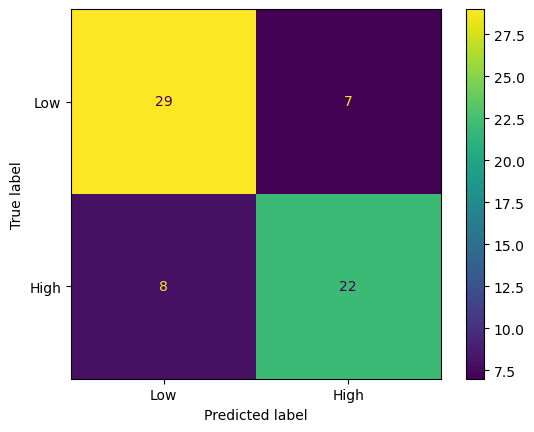

In [47]:
perform(y_pred_xgb)

## Save the XGBoost Classifier model

In [48]:
filename = 'Heart_Attack_Prediction_XGB.h5'
pickle.dump(model_xgb, open(filename, 'wb'))

# Decision Tree

In [49]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.7
Recall :  0.7
Accuracy :  0.7272727272727273
F1 Score :  0.7

 [[27  9]
 [ 9 21]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        36
           1       0.70      0.70      0.70        30

    accuracy                           0.73        66
   macro avg       0.72      0.72      0.72        66
weighted avg       0.73      0.73      0.73        66

******************************************************



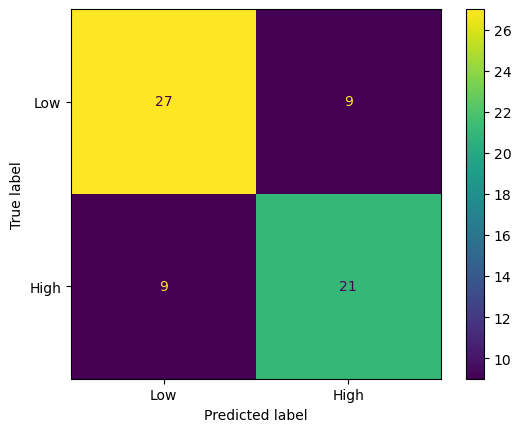

In [51]:
perform(y_pred_dt)

## Save the Decision Tree model

In [52]:
filename = 'Heart_Attack_Prediction_DT.h5'
pickle.dump(model_dt, open(filename, 'wb'))

## Decision Tree Visualization

In [53]:
feature_names = df.columns[0:13]
viz = df.copy()
viz["output"]=viz["output"].values.astype(str)
print(viz.dtypes)
target_names = viz['output'].unique().tolist()

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output       object
dtype: object


In [54]:
target_names

['1', '0']

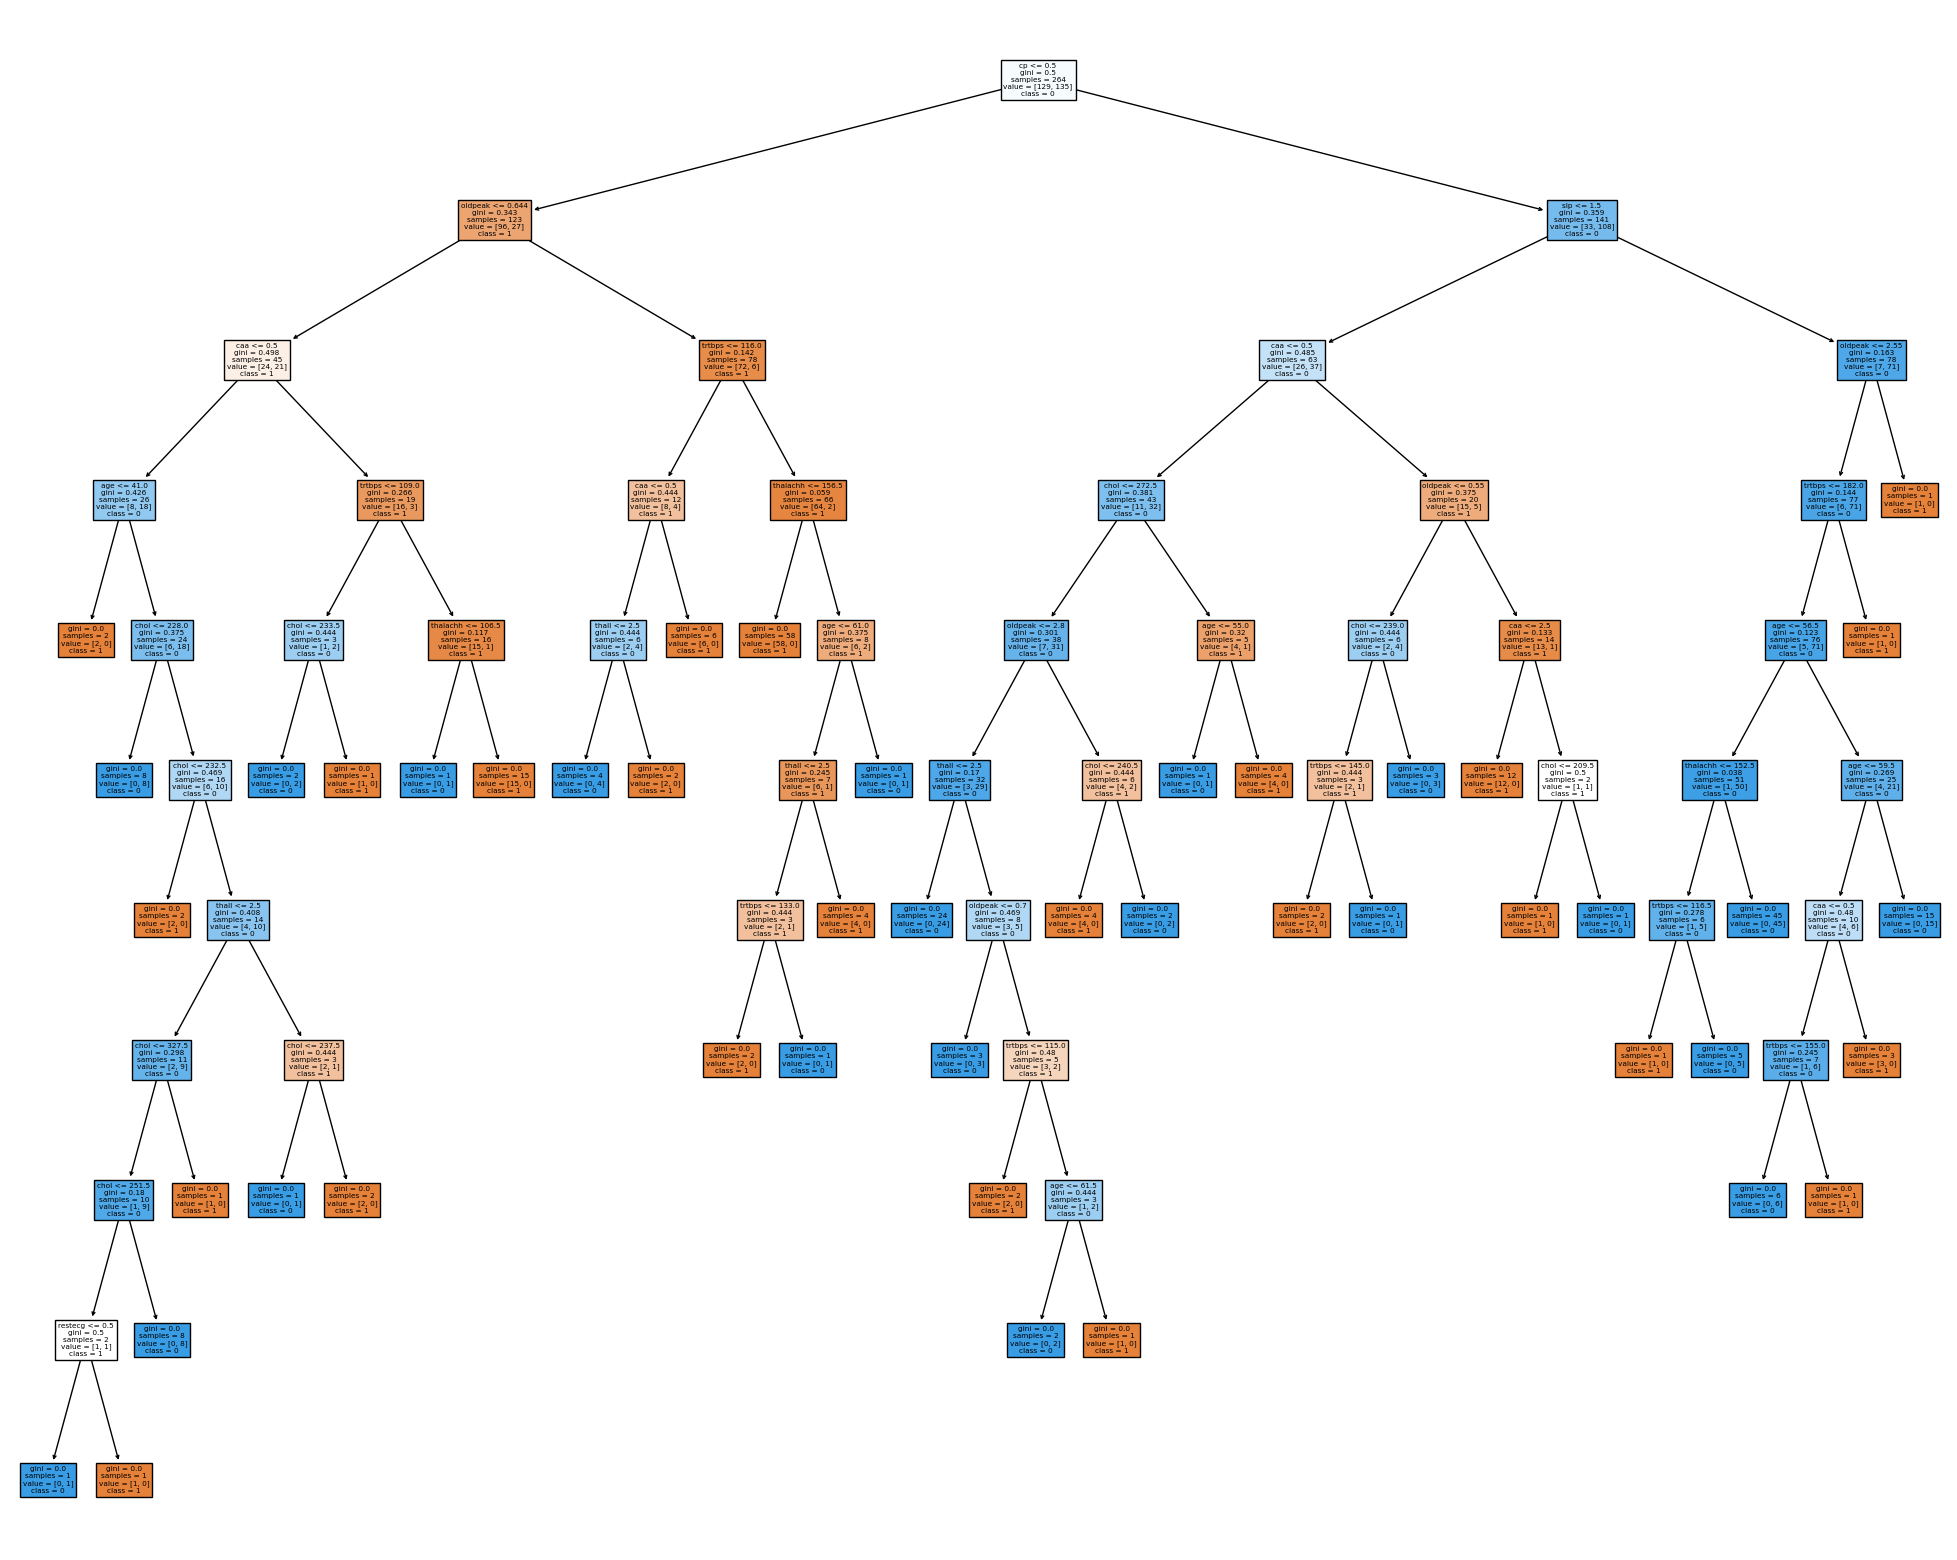

In [55]:
plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

In [56]:
viz_model = dtreeviz.model(model_dt,
                           X_train=x_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='Heart Attack Chances',
                           class_names=['High', 'Low'])

v = viz_model.view()     # render as SVG into internal object
v.save("Heart Attack Chances.svg")  # save as svg

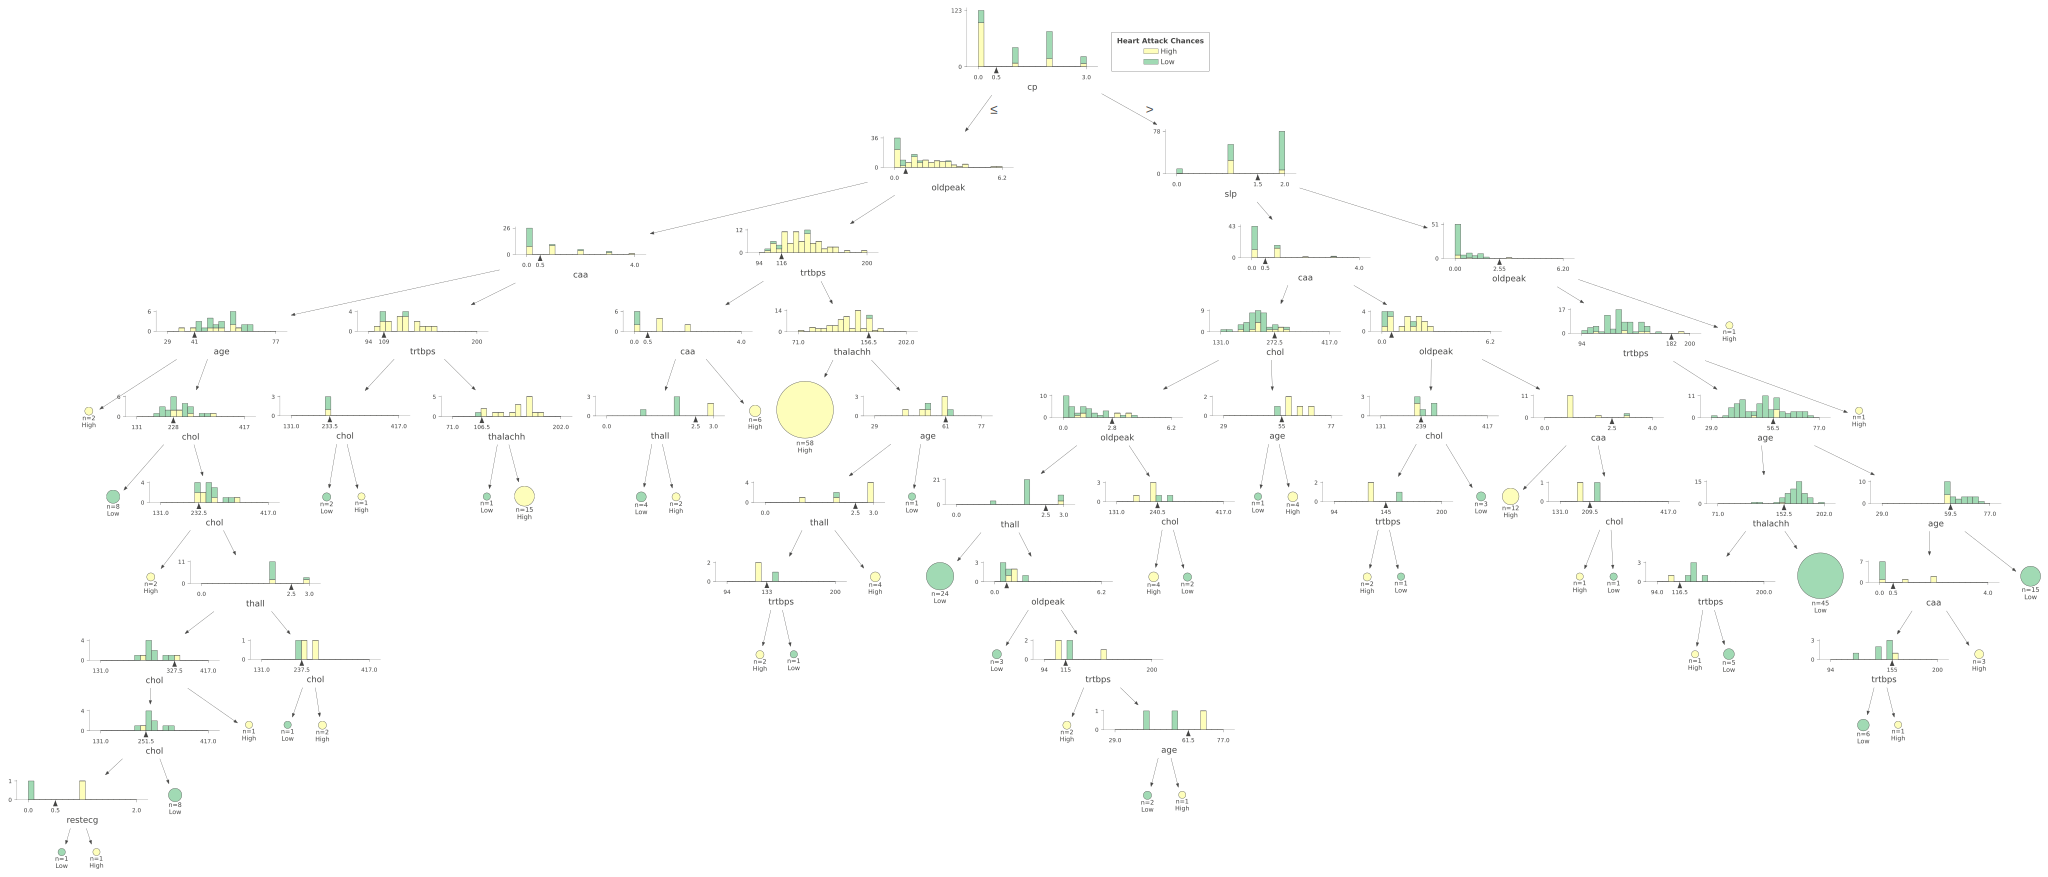

In [57]:
viz_model.view()

# Random Forest

In [58]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.8076923076923077
Recall :  0.7
Accuracy :  0.7878787878787878
F1 Score :  0.75

 [[31  5]
 [ 9 21]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        36
           1       0.81      0.70      0.75        30

    accuracy                           0.79        66
   macro avg       0.79      0.78      0.78        66
weighted avg       0.79      0.79      0.79        66

******************************************************



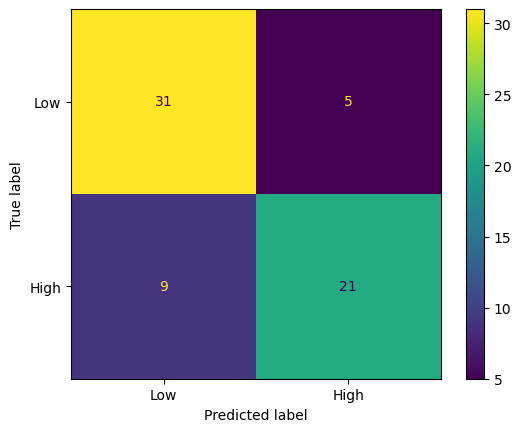

In [60]:
perform(y_pred_rf)

## Save the Random Forest model

In [61]:
filename = 'Heart_Attack_Prediction_RF.h5'
pickle.dump(model_rf, open(filename, 'wb'))

# K-Nearest Neighbors

In [62]:
iteration = 25

In [63]:
error_rate = []
acc = []
scores = {}

for i in range(1,iteration):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))
    scores[i] = accuracy_score(y_test, y_pred_knn)
    acc.append(accuracy_score(y_test, y_pred_knn))

scores

{1: 0.6818181818181818,
 2: 0.6212121212121212,
 3: 0.6060606060606061,
 4: 0.6666666666666666,
 5: 0.6666666666666666,
 6: 0.6818181818181818,
 7: 0.6818181818181818,
 8: 0.7121212121212122,
 9: 0.7121212121212122,
 10: 0.6515151515151515,
 11: 0.6515151515151515,
 12: 0.6363636363636364,
 13: 0.6212121212121212,
 14: 0.6363636363636364,
 15: 0.6212121212121212,
 16: 0.6515151515151515,
 17: 0.696969696969697,
 18: 0.6818181818181818,
 19: 0.6818181818181818,
 20: 0.6818181818181818,
 21: 0.6818181818181818,
 22: 0.6666666666666666,
 23: 0.6818181818181818,
 24: 0.696969696969697}

Minimum error:- 0.2878787878787879 at K = 7


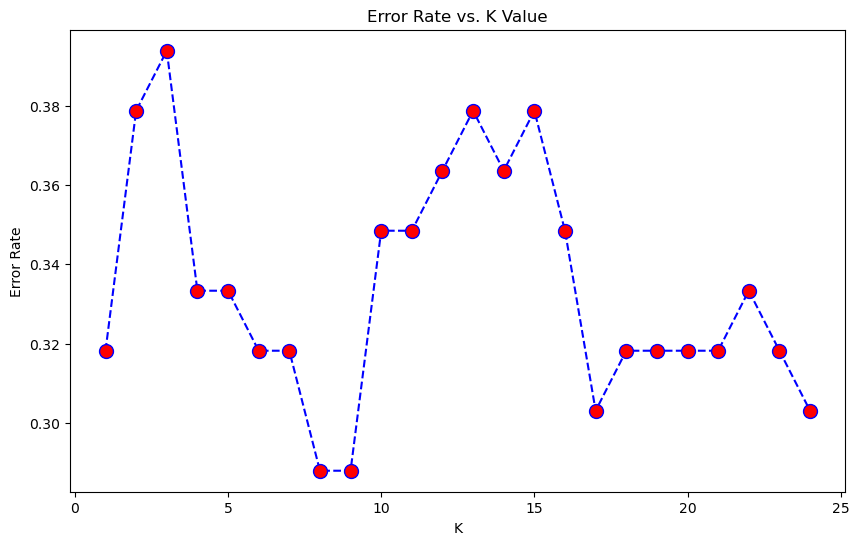

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7121212121212122 at K = 7


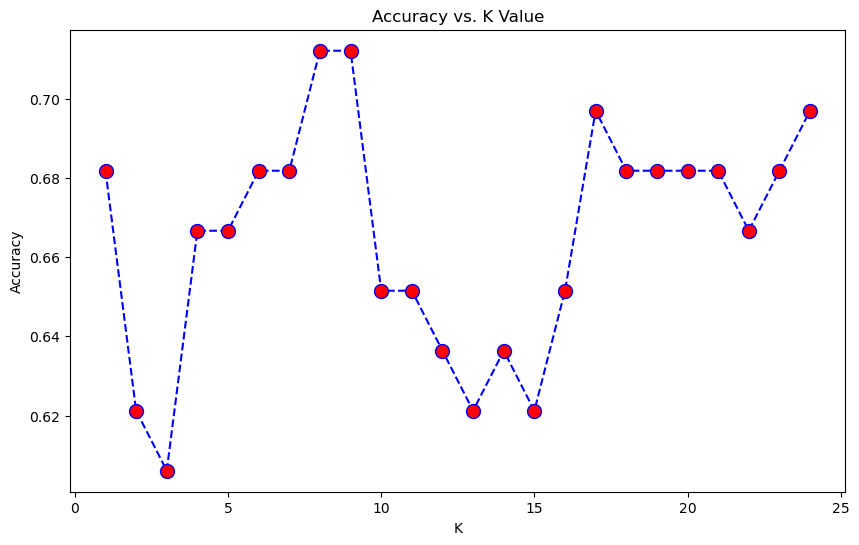

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration),acc,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [66]:
model_knn = KNeighborsClassifier(n_neighbors = 23)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [67]:
y_pred_knn = model_knn.predict(x_test)

Precision :  0.6956521739130435
Recall :  0.5333333333333333
Accuracy :  0.6818181818181818
F1 Score :  0.6037735849056605

 [[29  7]
 [14 16]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        36
           1       0.70      0.53      0.60        30

    accuracy                           0.68        66
   macro avg       0.69      0.67      0.67        66
weighted avg       0.68      0.68      0.67        66

******************************************************



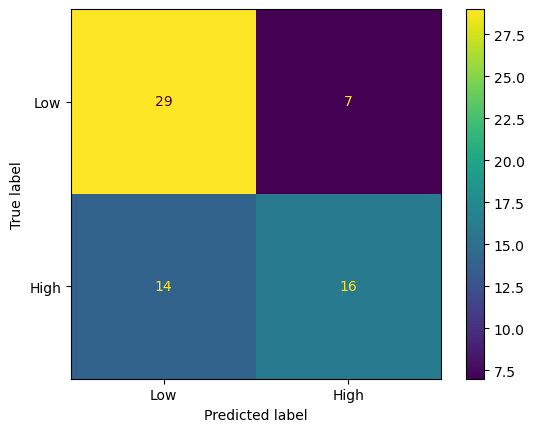

In [68]:
perform(y_pred_knn)

## Save the KNN model

In [69]:
filename = 'Heart_Attack_Prediction_KNN.h5'
pickle.dump(model_knn, open(filename, 'wb'))

# Support Vector Classifier with Linear Kernel

In [70]:
model_svc = SVC(kernel='linear')
model_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [71]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.7096774193548387
Recall :  0.7333333333333333
Accuracy :  0.7424242424242424
F1 Score :  0.7213114754098361

 [[27  9]
 [ 8 22]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        36
           1       0.71      0.73      0.72        30

    accuracy                           0.74        66
   macro avg       0.74      0.74      0.74        66
weighted avg       0.74      0.74      0.74        66

******************************************************



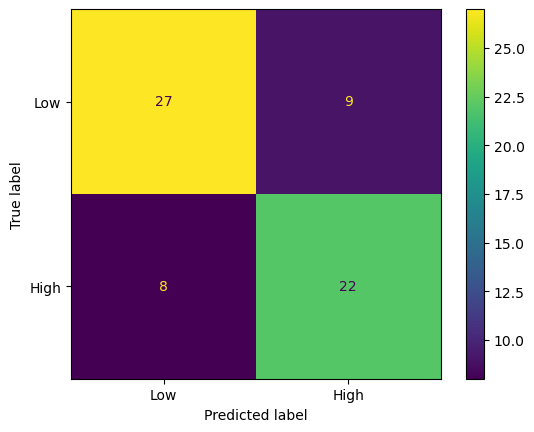

In [72]:
perform(y_pred_svc)

## Save the SVC model

In [73]:
filename = 'Heart_Attack_Prediction_SVC.h5'
pickle.dump(model_svc, open(filename, 'wb'))

# Nu-Support Vector Classifier

In [74]:
model_nsvc = NuSVC()
model_nsvc.fit(x_train, y_train)

NuSVC()

In [75]:
y_pred_nsvc = model_nsvc.predict(x_test)

Precision :  0.75
Recall :  0.7
Accuracy :  0.7575757575757576
F1 Score :  0.7241379310344827

 [[29  7]
 [ 9 21]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.75      0.70      0.72        30

    accuracy                           0.76        66
   macro avg       0.76      0.75      0.75        66
weighted avg       0.76      0.76      0.76        66

******************************************************



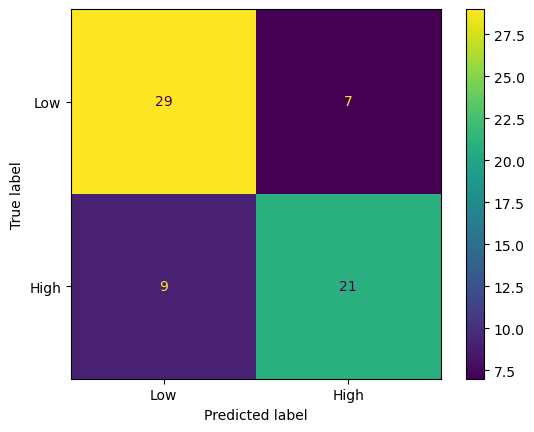

In [76]:
perform(y_pred_nsvc)

## Save the NuSVC model

In [77]:
filename = 'Heart_Attack_Prediction_NuSVC.h5'
pickle.dump(model_nsvc, open(filename, 'wb'))

# Multi-Layer Perceptron

In [78]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

MLPClassifier()

In [79]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.7741935483870968
Recall :  0.8
Accuracy :  0.803030303030303
F1 Score :  0.7868852459016393

 [[29  7]
 [ 6 24]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.77      0.80      0.79        30

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66

******************************************************



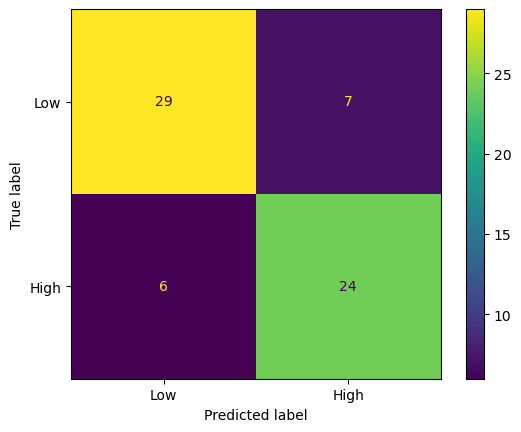

In [80]:
perform(y_pred_mlp)

## Save the MLP model

In [81]:
filename = 'Heart_Attack_Prediction_MLP.h5'
try:
    pickle.dump(model_mlp, open(filename, 'wb'))
    print(f"{'Model Saved':-^40}")
except:
    print("!!! Model not saved !!!")

--------------Model Saved---------------


# Precision-Recall Curve

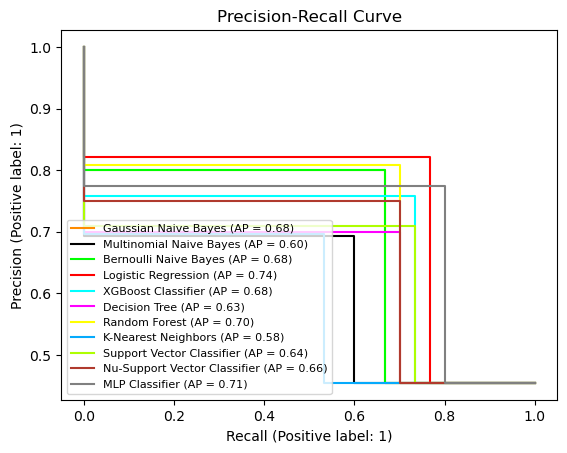

In [82]:
fig, ax = plt.subplots()
plt.title("Precision-Recall Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_gnb, ax=ax, name=f"Gaussian Naive Bayes", color="darkorange")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_bnb, name=f"Bernoulli Naive Bayes", color="lime", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="red", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost Classifier", color="cyan", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="magenta", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="yellow", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_knn, name=f"K-Nearest Neighbors", color="#05AAFC", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name=f"Support Vector Classifier", color="#AEFE01", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nsvc, name=f"Nu-Support Vector Classifier", color="#B03A2E", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mlp, name=f"MLP Classifier", color="gray", ax=ax)
plt.legend(loc="best", fontsize="8")

# ROC Curve

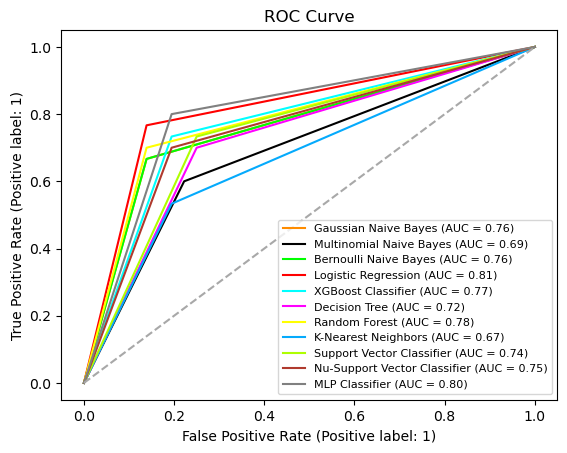

In [83]:
fig, ax = plt.subplots()
plt.title("ROC Curve")
RocCurveDisplay.from_predictions(y_test, y_pred_gnb, ax=ax, name=f"Gaussian Naive Bayes", color="darkorange")
RocCurveDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_bnb, name=f"Bernoulli Naive Bayes", color="lime", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="red", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost Classifier", color="cyan", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="magenta", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="yellow", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_knn, name=f"K-Nearest Neighbors", color="#05AAFC", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_svc, name=f"Support Vector Classifier", color="#AEFE01", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_nsvc, name=f"Nu-Support Vector Classifier", color="#B03A2E", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_mlp, name=f"MLP Classifier", color="gray", ax=ax)
plt.plot([0,1], [0,1], color="#A8A8A8", linestyle="--")
plt.legend(loc='best', fontsize="8")

<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you For viewing this Notebook 😃, do upvote 🔼 if you like it and please feel free to provide any feedback.</em>
<p style="text-align:center"><img src="https://download-free-images.com/img/00003/thank-you-771656.gif" width="480" height="200"></p>